# GMM (Gaussian Mixture Model)
군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합의 혼합이라는 가정 하에 군집화

서로 다른 데이터셋으로부터 온 정규 분포에 기반해 군집화를 수행

클러스터링 하려는 데이터 분포에서 개별 정규 분포 찾기 -> 데이터가 그 특정 정규 분포에 해당될 확률 구하기

Scikit Learn 에서는 GMM의 EM 방식을 통한 모수 추정 군집화 지원 (GaussianMixture)

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF["target"] = iris.target

n_components가 중요 초기화 파라미터

In [2]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_lables = gmm.predict(iris.data)

irisDF["gmm_cluster"] = gmm_cluster_lables
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["gmm_cluster"].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [3]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF["kmeans_cluster"] = kmeans_cluster_labels
iris_result = irisDF.groupby(["target"])["kmeans_cluster"].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


## Compare GMM and K-Means

KMeans: 원형의 형태로 군집화 수행. 타원 분포에 약함


In [5]:
# visualize cluster
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, \
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', \
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

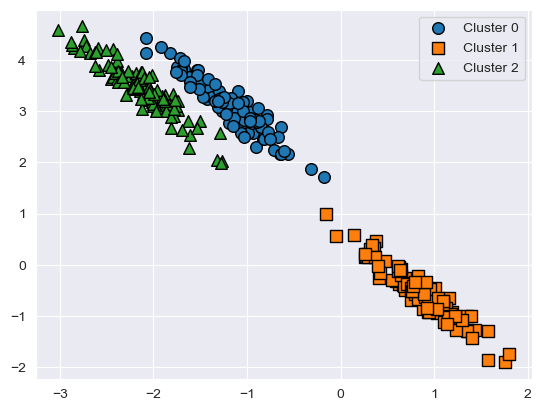

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

transformation = [[0.608, -0.637], [-0.409, 0.853]]
X_aniso = np.dot(X, transformation)

clusterDF = pd.DataFrame(data=X_aniso, columns=["ftr1", "ftr2"])
clusterDF["target"] = y

visualize_cluster_plot(None, clusterDF, "target", iscenter=False)

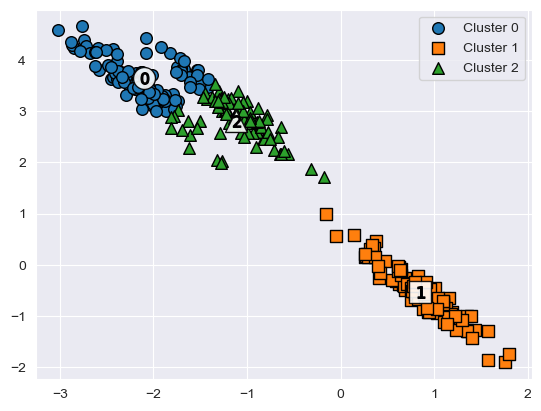

In [8]:
# kmeans
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF["kmeans_label"] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, "kmeans_label", iscenter=True)

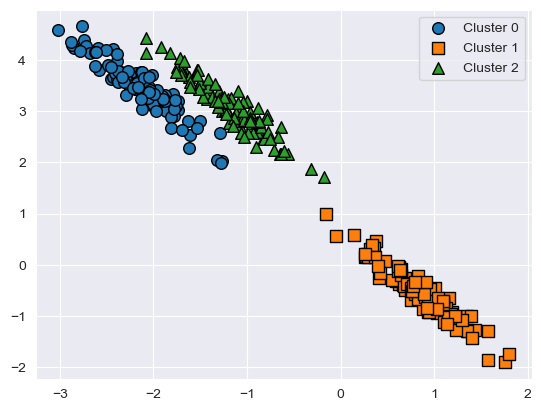

In [9]:
# GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF["gmm_label"] = gmm_label

visualize_cluster_plot(gmm, clusterDF, "gmm_label", iscenter=False)

In [11]:
print("KMeans Clustering:")
print(clusterDF.groupby("target")["kmeans_label"].value_counts())

print("Gaussian Mixture Clustering:")
print(clusterDF.groupby("target")["gmm_label"].value_counts())

KMeans Clustering:
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64
Gaussian Mixture Clustering:
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


GMM은 다양한 데이터 세트에 잘 적용되지만, 수행 시간이 오래 걸림